In [1]:
#picture of food allergy related for here & readme

# EDA

### Why
(Story here)
You most likely know a child with food allergies. 

### Problem
Predict the future increase of children's food allergies.

The ability to predict an increase in prevalance of a specific food allergy identifies new trends and allows research to pivot towards a specific one.

### Import libraries, read in csv, set view options.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, make_scorer, recall_score, plot_roc_curve, classification_report, plot_confusion_matrix, confusion_matrix, precision_score
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
import re
from imblearn.over_sampling import SMOTE

In [3]:
# read in csv
df = pd.read_csv('food-allergy-analysis-Zenodo.csv')

# setting my preferred view
pd.set_option('display.max_columns', 100) 
pd.set_option('display.max_rows', 100) 
pd.set_option('display.max_colwidth', 100)  # num of characters in each column entry
df.head(15)

,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,SHELLFISH_ALG_END,FISH_ALG_START,FISH_ALG_END,MILK_ALG_START,MILK_ALG_END,SOY_ALG_START,SOY_ALG_END,EGG_ALG_START,EGG_ALG_END,WHEAT_ALG_START,WHEAT_ALG_END,PEANUT_ALG_START,PEANUT_ALG_END,SESAME_ALG_START,SESAME_ALG_END,TREENUT_ALG_START,TREENUT_ALG_END,WALNUT_ALG_START,WALNUT_ALG_END,PECAN_ALG_START,PECAN_ALG_END,PISTACH_ALG_START,PISTACH_ALG_END,ALMOND_ALG_START,ALMOND_ALG_END,BRAZIL_ALG_START,BRAZIL_ALG_END,HAZELNUT_ALG_START,HAZELNUT_ALG_END,CASHEW_ALG_START,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX
0,1,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P1 - Medicaid,False,0.093087,3.164956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1994,S1 - Female,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,False,12.232717,18.880219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.262834,18.880219,2.0
2,3,2006,S0 - Male,R0 - White,E1 - Hispanic,P0 - Non-Medicaid,True,0.010951,6.726899,NaN,NaN,NaN,NaN,1.002053,1.002053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.884326,NaN,3.917864,6.157426,5.127995,NaN,1.404517,6.157426,4.0
3,4,2004,S0 - Male,R4 - Unknown,E1 - Hispanic,P0 - Non-Medicaid,False,2.398357,9.111567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P0 - Non-Medicaid,False,0.013689,6.193018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,2006,S0 - Male,R0 - White,E0 - Non-Hispanic,P1 - Medicaid,False,0.087611,4.958248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,2006,S1 - Female,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,False,0.010951,6.677618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P0 - Non-Medicaid,True,0.032854,6.286105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,2006,S0 - Male,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,True,0.019165,6.726899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.221081,1.221081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.015743,1.015743,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P1 - Medicaid,True,0.021903,6.275154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333200 entries, 0 to 333199
Data columns (total 50 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   SUBJECT_ID               333200 non-null  int64  
 1   BIRTH_YEAR               333200 non-null  int64  
 2   GENDER_FACTOR            333200 non-null  object 
 3   RACE_FACTOR              333200 non-null  object 
 4   ETHNICITY_FACTOR         333200 non-null  object 
 5   PAYER_FACTOR             333200 non-null  object 
 6   ATOPIC_MARCH_COHORT      333200 non-null  bool   
 7   AGE_START_YEARS          333200 non-null  float64
 8   AGE_END_YEARS            333200 non-null  float64
 9   SHELLFISH_ALG_START      5246 non-null    float64
 10  SHELLFISH_ALG_END        1051 non-null    float64
 11  FISH_ALG_START           1796 non-null    float64
 12  FISH_ALG_END             527 non-null     float64
 13  MILK_ALG_START           7289 non-null    float64
 14  MILK

### TODO

- Drop payer_factor(medicaid vs non-medicaid)
- Drop treenut bc it only has one entry
- Fill nan's
- parse out GENDER_FACTOR, RACE_FACTOR, ETHNICITY_FACTOR
- Double check changes stuck to main DF 
- Make food allergy only sublist
- Add target column to main df
    - sum of df_ALG columns 
    - new column for 'food_alg' or 'no_food_alg'
- Eczema/asthma/allergic rhinitis subset
- TTS, ONE, smote?

In [5]:
# Drop payer_factor & treenut 
df = df.drop(['PAYER_FACTOR','TREENUT_ALG_START','TREENUT_ALG_END'], axis=1)

In [6]:
#replacing nans
df = df.fillna(0)

In [7]:
# parsing out GENDER_FACTOR, RACE_FACTOR, ETHNICITY_FACTOR
df_GenRaceEth = df.loc[:,'GENDER_FACTOR':'ETHNICITY_FACTOR']

df['GENDER_FACTOR'] = df_GenRaceEth['GENDER_FACTOR'].apply(lambda x: x.replace('S','').replace('- Male','').replace('- Female',''))
df['RACE_FACTOR'] = df_GenRaceEth['RACE_FACTOR'].apply(lambda x: x.replace('R','').replace('- White','').replace('- Black','').replace('- Unknown','').replace('- Asian or Pacific Islander','').replace('- Other',''))
df['ETHNICITY_FACTOR'] = df_GenRaceEth['ETHNICITY_FACTOR'].apply(lambda x: x.replace('E','').replace('- Non-Hispanic','').replace('- Hispanic',''))
df

,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,SHELLFISH_ALG_END,FISH_ALG_START,FISH_ALG_END,MILK_ALG_START,MILK_ALG_END,SOY_ALG_START,SOY_ALG_END,EGG_ALG_START,EGG_ALG_END,WHEAT_ALG_START,WHEAT_ALG_END,PEANUT_ALG_START,PEANUT_ALG_END,SESAME_ALG_START,SESAME_ALG_END,WALNUT_ALG_START,WALNUT_ALG_END,PECAN_ALG_START,PECAN_ALG_END,PISTACH_ALG_START,PISTACH_ALG_END,ALMOND_ALG_START,ALMOND_ALG_END,BRAZIL_ALG_START,BRAZIL_ALG_END,HAZELNUT_ALG_START,HAZELNUT_ALG_END,CASHEW_ALG_START,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX
0,1,2006,1,1,0,False,0.093087,3.164956,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,2,1994,1,0,0,False,12.232717,18.880219,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.262834,18.880219,2.0
2,3,2006,0,0,1,True,0.010951,6.726899,0.0,0.0,0.0,0.0,1.002053,1.002053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.884326,0.000000,3.917864,6.157426,5.127995,0.000000,1.404517,6.157426,4.0
3,4,2004,0,4,1,False,2.398357,9.111567,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,5,2006,1,1,0,False,0.013689,6.193018,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333195,333196,2006,0,0,0,False,0.736482,7.449692,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.736482,0.000000,0.000000,0.000000,5.426420,7.449692,0.000000,0.000000,0.0
333196,333197,2006,1,1,0,True,0.019165,6.984257,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
333197,333198,2006,0,0,0,False,0.443532,7.405886,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,2.321697,0.000000,2.321697,6.650240,4.0
333198,333199,2006,0,3,0,True,0.013689,7.017112,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [8]:
# genders, races, ethnicity vals listed

# df['GENDER_FACTOR'].value_counts() 
# S0 - Male      169032
# S1 - Female    164168
# -----------------------------
# df['RACE_FACTOR'].value_counts() 
# R0 - White                        183308
# R1 - Black                         97795
# R4 - Unknown                       40940
# R2 - Asian or Pacific Islander      9152
# R3 - Other                          2005
# ------------------------------
# df['ETHNICITY_FACTOR'].value_counts()
# E0 - Non-Hispanic    317868
# E1 - Hispanic         15332

In [9]:
# allergy only sublist
df_ALG = df.loc[:,'SHELLFISH_ALG_START':'CASHEW_ALG_END']
df_ALG

,SHELLFISH_ALG_START,SHELLFISH_ALG_END,FISH_ALG_START,FISH_ALG_END,MILK_ALG_START,MILK_ALG_END,SOY_ALG_START,SOY_ALG_END,EGG_ALG_START,EGG_ALG_END,WHEAT_ALG_START,WHEAT_ALG_END,PEANUT_ALG_START,PEANUT_ALG_END,SESAME_ALG_START,SESAME_ALG_END,WALNUT_ALG_START,WALNUT_ALG_END,PECAN_ALG_START,PECAN_ALG_END,PISTACH_ALG_START,PISTACH_ALG_END,ALMOND_ALG_START,ALMOND_ALG_END,BRAZIL_ALG_START,BRAZIL_ALG_END,HAZELNUT_ALG_START,HAZELNUT_ALG_END,CASHEW_ALG_START,CASHEW_ALG_END
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.002053,1.002053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333195,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
333196,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
333197,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
333198,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
df.columns.str.endswith('START')
df = df.loc[:,~df.columns.str.endswith('START')]
df.min()

SUBJECT_ID                     1
BIRTH_YEAR                  1983
GENDER_FACTOR                 0 
RACE_FACTOR                   0 
ETHNICITY_FACTOR              0 
ATOPIC_MARCH_COHORT        False
AGE_START_YEARS         -4.31211
AGE_END_YEARS            1.00205
SHELLFISH_ALG_END              0
FISH_ALG_END                   0
MILK_ALG_END            -4.00821
SOY_ALG_END              -2.2642
EGG_ALG_END             -98.8665
WHEAT_ALG_END                  0
PEANUT_ALG_END                 0
SESAME_ALG_END                 0
WALNUT_ALG_END                 0
PECAN_ALG_END                  0
PISTACH_ALG_END                0
ALMOND_ALG_END                 0
BRAZIL_ALG_END                 0
HAZELNUT_ALG_END               0
CASHEW_ALG_END                 0
ATOPIC_DERM_END                0
ALLERGIC_RHINITIS_END          0
ASTHMA_END                     0
FIRST_ASTHMARX                 0
LAST_ASTHMARX                  0
NUM_ASTHMARX                   0
ALG_TOTAL               -195.466
ALG_target

In [11]:
# df.columns.str.startswith('FIRST')
# df = df.loc[:,~df.columns.str.startswith('FIRST')]
# df.info()

In [12]:
# if the sum of the nonpreexisting colums in the observation equal zero, then food allergy equals zero
# after target, small logistic regression

# adding df_ALF to main df as the column 'TOTAL'
df['ALG_TOTAL'] = df_ALG.sum(axis=1)
df

<ipython-input-12-5830d73135c6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ALG_TOTAL'] = df_ALG.sum(axis=1)


,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_END,FISH_ALG_END,MILK_ALG_END,SOY_ALG_END,EGG_ALG_END,WHEAT_ALG_END,PEANUT_ALG_END,SESAME_ALG_END,WALNUT_ALG_END,PECAN_ALG_END,PISTACH_ALG_END,ALMOND_ALG_END,BRAZIL_ALG_END,HAZELNUT_ALG_END,CASHEW_ALG_END,ATOPIC_DERM_END,ALLERGIC_RHINITIS_END,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX,ALG_TOTAL
0,1,2006,1,1,0,False,0.093087,3.164956,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,2,1994,1,0,0,False,12.232717,18.880219,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,12.262834,18.880219,2.0,0.000000
2,3,2006,0,0,1,True,0.010951,6.726899,0.0,0.0,1.002053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,6.157426,0.000000,1.404517,6.157426,4.0,2.004107
3,4,2004,0,4,1,False,2.398357,9.111567,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,5,2006,1,1,0,False,0.013689,6.193018,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333195,333196,2006,0,0,0,False,0.736482,7.449692,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,7.449692,0.000000,0.000000,0.0,0.000000
333196,333197,2006,1,1,0,True,0.019165,6.984257,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
333197,333198,2006,0,0,0,False,0.443532,7.405886,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,2.321697,6.650240,4.0,0.000000
333198,333199,2006,0,3,0,True,0.013689,7.017112,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [13]:
df['ALG_TOTAL'].value_counts()

0.000000     310593
2.009582         27
2.036961         24
2.004107         24
1.511294         23
              ...  
36.216290         1
4.596851          1
6.329911          1
4.862423          1
20.799452         1
Name: ALG_TOTAL, Length: 12745, dtype: int64

In [14]:
# zero = no allergy | greater than zero = Allergy
df['ALG_target'] = ['Allergy' if x > 0 else 'No_Allergy' for x in df['ALG_TOTAL']]

<ipython-input-14-6cbc17fd498f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ALG_target'] = ['Allergy' if x > 0 else 'No_Allergy' for x in df['ALG_TOTAL']]


In [15]:
df['ALG_target'].value_counts()

No_Allergy    310602
Allergy        22598
Name: ALG_target, dtype: int64

### Repeat previous to make Eczema/Asthma/Rhinitis sublist - df.EAR

In [16]:
# E/A/R sublist
df_EAR = df.loc[:,'ATOPIC_DERM_END':'LAST_ASTHMARX']
df_EAR

,ATOPIC_DERM_END,ALLERGIC_RHINITIS_END,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,12.262834,18.880219
2,0.000000,6.157426,0.000000,1.404517,6.157426
3,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
333195,0.000000,0.000000,7.449692,0.000000,0.000000
333196,0.000000,0.000000,0.000000,0.000000,0.000000
333197,0.000000,0.000000,0.000000,2.321697,6.650240
333198,0.000000,0.000000,0.000000,0.000000,0.000000


## Visualizing ratios & data
Female-Male
Age hist
Bin to 3 ages?

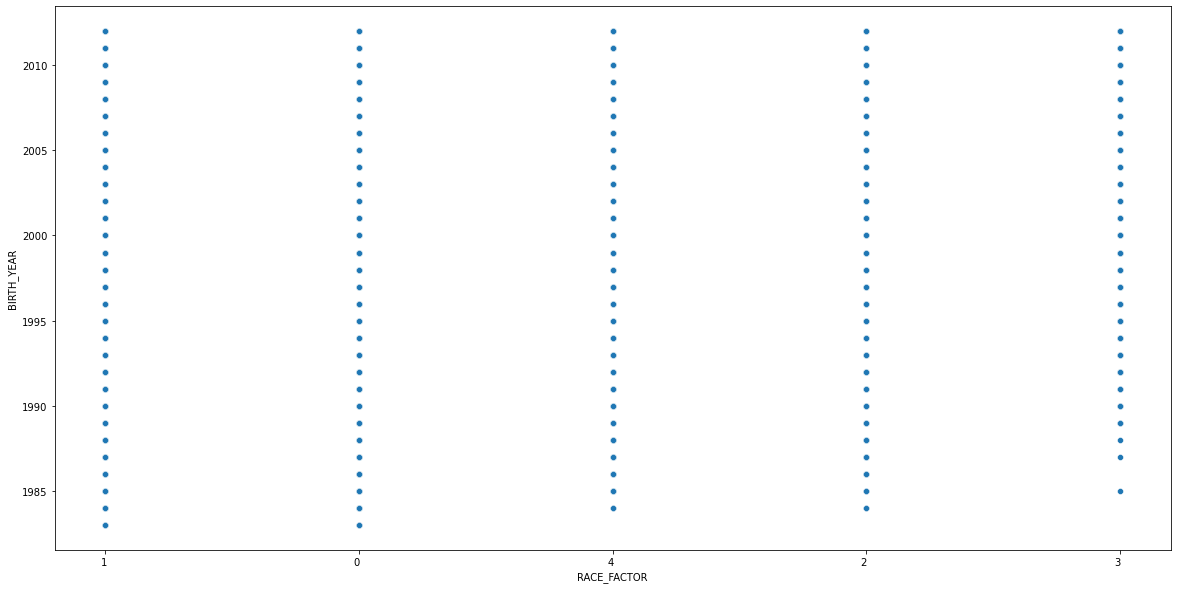

In [17]:
# female to male
plt.figure(figsize=(20,10))
bp_barplot = sns.scatterplot(data=df, y='BIRTH_YEAR', x='RACE_FACTOR')

In [18]:

# use iloc for subset using column indexes
# will return to later
# df_EAR_START = df_EAR.iloc[,: 0,2,4,6]

In [19]:
# sums
df['EAR_TOTAL'] = df_EAR.sum(axis=1)
df

<ipython-input-19-3e3da8fa80d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EAR_TOTAL'] = df_EAR.sum(axis=1)


,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_END,FISH_ALG_END,MILK_ALG_END,SOY_ALG_END,EGG_ALG_END,WHEAT_ALG_END,PEANUT_ALG_END,SESAME_ALG_END,WALNUT_ALG_END,PECAN_ALG_END,PISTACH_ALG_END,ALMOND_ALG_END,BRAZIL_ALG_END,HAZELNUT_ALG_END,CASHEW_ALG_END,ATOPIC_DERM_END,ALLERGIC_RHINITIS_END,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX,ALG_TOTAL,ALG_target,EAR_TOTAL
0,1,2006,1,1,0,False,0.093087,3.164956,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,No_Allergy,0.000000
1,2,1994,1,0,0,False,12.232717,18.880219,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,12.262834,18.880219,2.0,0.000000,No_Allergy,31.143053
2,3,2006,0,0,1,True,0.010951,6.726899,0.0,0.0,1.002053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,6.157426,0.000000,1.404517,6.157426,4.0,2.004107,Allergy,13.719370
3,4,2004,0,4,1,False,2.398357,9.111567,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,No_Allergy,0.000000
4,5,2006,1,1,0,False,0.013689,6.193018,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,No_Allergy,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333195,333196,2006,0,0,0,False,0.736482,7.449692,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,7.449692,0.000000,0.000000,0.0,0.000000,No_Allergy,7.449692
333196,333197,2006,1,1,0,True,0.019165,6.984257,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,No_Allergy,0.000000
333197,333198,2006,0,0,0,False,0.443532,7.405886,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,2.321697,6.650240,4.0,0.000000,No_Allergy,8.971937
333198,333199,2006,0,3,0,True,0.013689,7.017112,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,No_Allergy,0.000000


In [20]:
# zero = no E/A/R| greater than zero = Yes to one E/A/R
df['EAR_target'] = ['EAR' if x > 0 else 'No_EAR' for x in df['EAR_TOTAL']]
df

<ipython-input-20-af357a6864c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EAR_target'] = ['EAR' if x > 0 else 'No_EAR' for x in df['EAR_TOTAL']]


,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_END,FISH_ALG_END,MILK_ALG_END,SOY_ALG_END,EGG_ALG_END,WHEAT_ALG_END,PEANUT_ALG_END,SESAME_ALG_END,WALNUT_ALG_END,PECAN_ALG_END,PISTACH_ALG_END,ALMOND_ALG_END,BRAZIL_ALG_END,HAZELNUT_ALG_END,CASHEW_ALG_END,ATOPIC_DERM_END,ALLERGIC_RHINITIS_END,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX,ALG_TOTAL,ALG_target,EAR_TOTAL,EAR_target
0,1,2006,1,1,0,False,0.093087,3.164956,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,No_Allergy,0.000000,No_EAR
1,2,1994,1,0,0,False,12.232717,18.880219,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,12.262834,18.880219,2.0,0.000000,No_Allergy,31.143053,EAR
2,3,2006,0,0,1,True,0.010951,6.726899,0.0,0.0,1.002053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,6.157426,0.000000,1.404517,6.157426,4.0,2.004107,Allergy,13.719370,EAR
3,4,2004,0,4,1,False,2.398357,9.111567,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,No_Allergy,0.000000,No_EAR
4,5,2006,1,1,0,False,0.013689,6.193018,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,No_Allergy,0.000000,No_EAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333195,333196,2006,0,0,0,False,0.736482,7.449692,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,7.449692,0.000000,0.000000,0.0,0.000000,No_Allergy,7.449692,EAR
333196,333197,2006,1,1,0,True,0.019165,6.984257,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,No_Allergy,0.000000,No_EAR
333197,333198,2006,0,0,0,False,0.443532,7.405886,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,2.321697,6.650240,4.0,0.000000,No_Allergy,8.971937,EAR
333198,333199,2006,0,3,0,True,0.013689,7.017112,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,No_Allergy,0.000000,No_EAR


In [21]:
# create boolean of 
df['ALG_target_Bool'] = [0 if x > 0 else 1 for x in df['ALG_TOTAL']]
df['EAR_target_Bool'] = [0 if x > 0 else 1 for x in df['EAR_TOTAL']]
df

<ipython-input-21-cbe345a7e80e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ALG_target_Bool'] = [0 if x > 0 else 1 for x in df['ALG_TOTAL']]
<ipython-input-21-cbe345a7e80e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EAR_target_Bool'] = [0 if x > 0 else 1 for x in df['EAR_TOTAL']]


,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_END,FISH_ALG_END,MILK_ALG_END,SOY_ALG_END,EGG_ALG_END,WHEAT_ALG_END,PEANUT_ALG_END,SESAME_ALG_END,WALNUT_ALG_END,PECAN_ALG_END,PISTACH_ALG_END,ALMOND_ALG_END,BRAZIL_ALG_END,HAZELNUT_ALG_END,CASHEW_ALG_END,ATOPIC_DERM_END,ALLERGIC_RHINITIS_END,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX,ALG_TOTAL,ALG_target,EAR_TOTAL,EAR_target,ALG_target_Bool,EAR_target_Bool
0,1,2006,1,1,0,False,0.093087,3.164956,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,No_Allergy,0.000000,No_EAR,1,1
1,2,1994,1,0,0,False,12.232717,18.880219,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,12.262834,18.880219,2.0,0.000000,No_Allergy,31.143053,EAR,1,0
2,3,2006,0,0,1,True,0.010951,6.726899,0.0,0.0,1.002053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,6.157426,0.000000,1.404517,6.157426,4.0,2.004107,Allergy,13.719370,EAR,0,0
3,4,2004,0,4,1,False,2.398357,9.111567,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,No_Allergy,0.000000,No_EAR,1,1
4,5,2006,1,1,0,False,0.013689,6.193018,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,No_Allergy,0.000000,No_EAR,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333195,333196,2006,0,0,0,False,0.736482,7.449692,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,7.449692,0.000000,0.000000,0.0,0.000000,No_Allergy,7.449692,EAR,1,0
333196,333197,2006,1,1,0,True,0.019165,6.984257,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,No_Allergy,0.000000,No_EAR,1,1
333197,333198,2006,0,0,0,False,0.443532,7.405886,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,2.321697,6.650240,4.0,0.000000,No_Allergy,8.971937,EAR,1,0
333198,333199,2006,0,3,0,True,0.013689,7.017112,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,No_Allergy,0.000000,No_EAR,1,1


In [22]:
# create numeric only dataframe for modeling
df2 = df.drop(['ATOPIC_MARCH_COHORT', 'ALG_target','EAR_target', 'ALG_TOTAL', 'EAR_TOTAL', 'NUM_ASTHMARX', 'EAR_target_Bool'], axis=1)
df2

,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_END,FISH_ALG_END,MILK_ALG_END,SOY_ALG_END,EGG_ALG_END,WHEAT_ALG_END,PEANUT_ALG_END,SESAME_ALG_END,WALNUT_ALG_END,PECAN_ALG_END,PISTACH_ALG_END,ALMOND_ALG_END,BRAZIL_ALG_END,HAZELNUT_ALG_END,CASHEW_ALG_END,ATOPIC_DERM_END,ALLERGIC_RHINITIS_END,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,ALG_target_Bool
0,1,2006,1,1,0,0.093087,3.164956,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,2,1994,1,0,0,12.232717,18.880219,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,12.262834,18.880219,1
2,3,2006,0,0,1,0.010951,6.726899,0.0,0.0,1.002053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,6.157426,0.000000,1.404517,6.157426,0
3,4,2004,0,4,1,2.398357,9.111567,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1
4,5,2006,1,1,0,0.013689,6.193018,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333195,333196,2006,0,0,0,0.736482,7.449692,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,7.449692,0.000000,0.000000,1
333196,333197,2006,1,1,0,0.019165,6.984257,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1
333197,333198,2006,0,0,0,0.443532,7.405886,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,2.321697,6.650240,1
333198,333199,2006,0,3,0,0.013689,7.017112,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [23]:
df2['ALG_target_Bool'].value_counts()

1    310602
0     22598
Name: ALG_target_Bool, dtype: int64

### Features

In [24]:
# Credit given to Peter Voung
# Function that prints out training/test scores for each metric of training and test data and corresponding confusion matrix
def score_matrix_printer(model, X_train, y_train, X_test, y_test):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Cleaning up scores to be more visually appealing
    ascore_train = round((accuracy_score(y_train, train_pred) * 100), 2)
    pscore_train = round((precision_score(y_train, train_pred) * 100), 2)
    
    ascore_test = round((accuracy_score(y_test, test_pred) * 100), 2)
    pscore_test = round((precision_score(y_test, test_pred) * 100), 2)
    
    conf_mat = plot_confusion_matrix(model, X_test, y_test)
    roc_cirve = plot_roc_curve(model, X_test, y_test)
    
    print(f"""
    Train Accuracy: {ascore_train}%
    Train Precision: {pscore_train}%
    ------------------------------
    Test Accuracy: {ascore_test}%
    Test Precision: {pscore_test}%
    """)

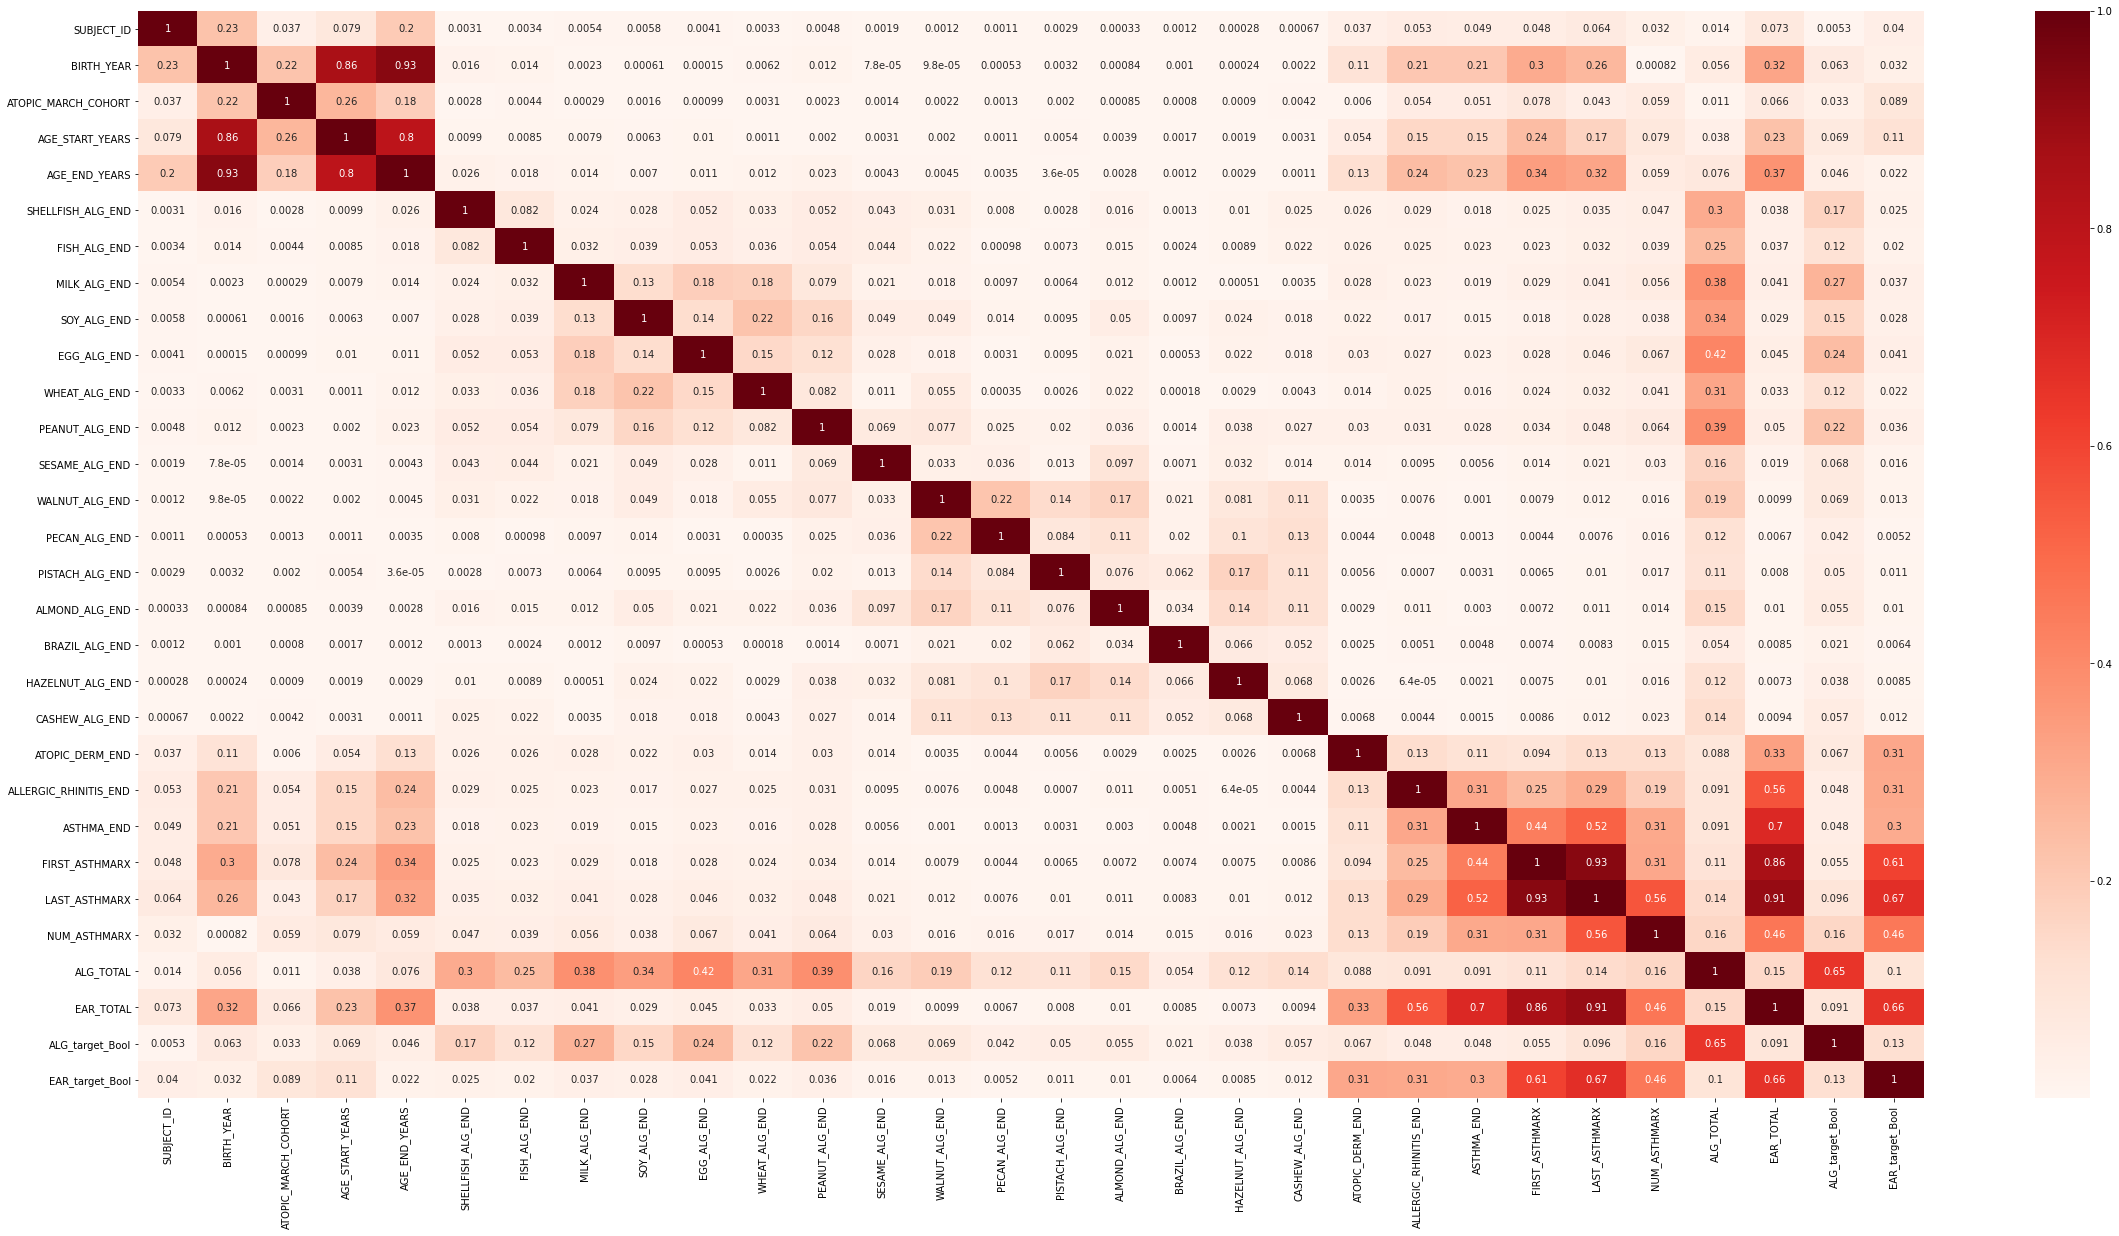

In [25]:
# heatmap to see correlations 
# also, is this called checking for colinearity?
corr = df.corr().abs()
fig, ax=plt.subplots(figsize=(40,20))
sns.heatmap(corr, cmap='Reds', annot=True);

# reshaping & trying corr w/ 2 df's
# corr = df_ALG.corrwith(df_EAR.iloc[0], axis=1)
# fig, ax=plt.subplots(figsize=(40,30))
# sns.heatmap(corr, cmap='Blues', annot=True);
#IndexError: Inconsistent shape between the condition and the input (got (333200, 1) and (333200,))


## Train-Test Split, Scale, SMOTE?

In [26]:
# train test split
y = df2['ALG_target_Bool']
X = df2.drop(['ALG_target_Bool'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# scale
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

# SMOTE data to achieve target variable balance
sm = SMOTE(sampling_strategy='minority', random_state=15)
X_train_scaled, y_train = sm.fit_resample(X_train_scaled, y_train)

In [27]:
y_train.value_counts()

1    217439
0    217439
Name: ALG_target_Bool, dtype: int64

## OHE

## Dummy Baseline Model

Train 0.5
Test 0.06799719887955182


/Users/darla/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



    Train Accuracy: 50.0%
    Train Precision: 0.0%
    ------------------------------
    Test Accuracy: 6.8%
    Test Precision: 0.0%
    


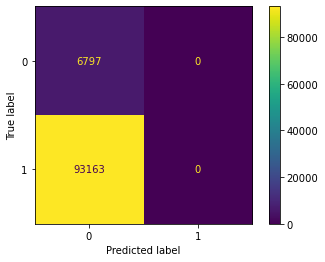

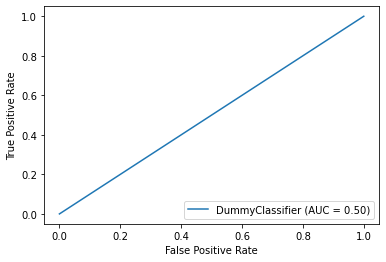

In [28]:
# Instantiated, fit, and ran dummy model

dum = DummyClassifier(strategy="most_frequent")
dum.fit(X_train_scaled, y_train)
y_hat_train = dum.predict(X_train_scaled)
y_hat_test = dum.predict(X_test_scaled)
print(f'Train {accuracy_score(y_train, y_hat_train)}')
print(f'Test {accuracy_score(y_test, y_hat_test)}')

# Plotted confusion matrix and ROC AUC for dummy model
score_matrix_printer(dum, X_train_scaled, y_train, X_test_scaled, y_test)


In [29]:
# dummying OHE on training
# sklearn.prepprocessing import LabelEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
ohe.fit_transform(X_train)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Logistic Regression Model

In [30]:
# instatiate logistic model
#fit to training
#score on test

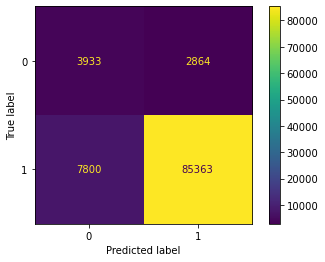

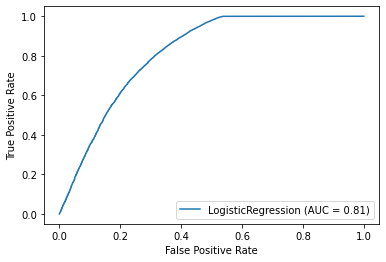

In [31]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_hat_train = logreg.predict(X_train_scaled)
y_hat_test = logreg.predict(X_test_scaled)

plot_confusion_matrix(logreg, X_test_scaled, y_test)
plot_roc_curve(logreg, X_test_scaled, y_test);


    Train Accuracy: 75.45%
    Train Precision: 69.25%
    ------------------------------
    Test Accuracy: 89.33%
    Test Precision: 96.75%
    


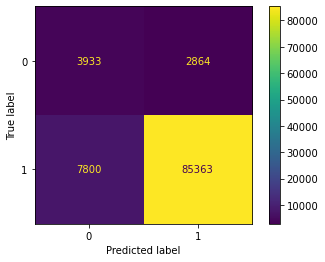

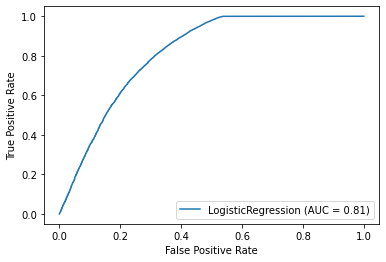

In [32]:
score_matrix_printer(logreg, X_train_scaled, y_train, X_test_scaled, y_test)

## Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

DTC = DecisionTreeClassifier(criterion='entropy', max_depth = 3)
DTC.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

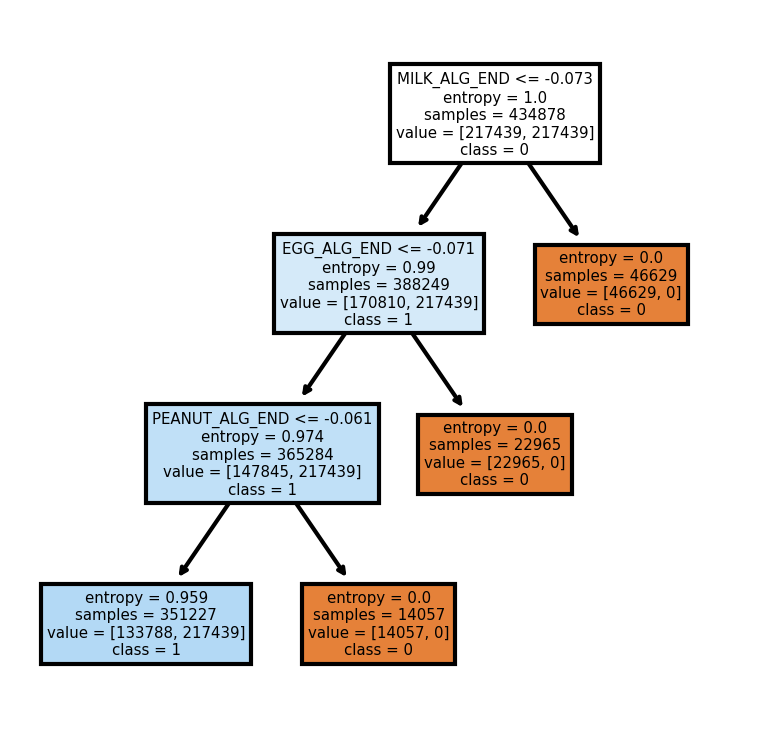

In [34]:
fig, axes = plt.subplots(nrows = 1,ncols =1 , figsize = (3,3), dpi=300)
plot_tree(DTC,
               feature_names = X_train.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()


    Train Accuracy: 69.24%
    Train Precision: 61.91%
    ------------------------------
    Test Accuracy: 95.69%
    Test Precision: 95.58%
    


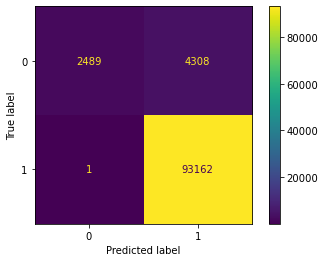

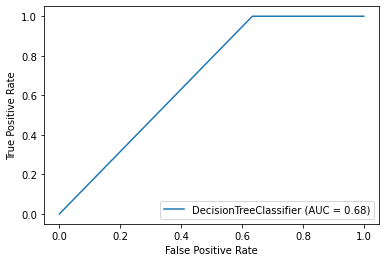

In [36]:
score_matrix_printer(DTC, X_train_scaled, y_train, X_test_scaled, y_test)